In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.constants import g

3.2: 2D Löser und ein Verfahren zweiter Ordnung 

In [4]:
def erhaltungsschema_2D(CFL, Nx, hl, hr, x0):
    
    x = np.linspace(0, 1, Nx)
    y = np.linspace(0, 1, Nx)
    
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    
   # Initialisierung der Arrays
    h = np.zeros((Nx, Nx), dtype = np.double)
    hu = np.zeros((Nx, Nx), dtype = np.double)
    hv = np.zeros((Nx, Nx), dtype = np.double)

    # Randbedingungen noch zu definieren
    #######################
    h[:,0] = np.where(x>=x0, hr, hl)
    h[:,Nx-1] = np.where(x>=x0, hr, hl)
    h[0,:] = np.where(x>=x0, hr, hl)
    h[Nx-1,:] = np.where(x>=x0, hr, hl)
    ################################################
    
    # Berechnung der Zeit
    z = 0 
    tmax = 5
    k = 0
    
    #Matrizen für die Berechnung der F_j12a, F_j12b, G_i12a und G_i12b
    
    F_j12a = np.zeros((Nx-1, Nx-1), dtype = np.double)
    F_j12b = np.zeros((Nx-1, Nx-1), dtype = np.double)
    G_i12a = np.zeros((Nx-1, Nx-1), dtype = np.double)  
    G_i12b = np.zeros((Nx-1, Nx-1), dtype = np.double)
    
    while z < tmax:
        
        # Zeitschritt berechnen
        for i in range(1, Nx-1):
            for j in range(1, Nx-1):
                if h[i,j] > 0:
                    dt = CFL * min(dx / abs(hu[i,j] + np.sqrt(g*h[i,j])), dy / abs(hv[i,j] + np.sqrt(g*h[i,j])))
                else:
                    dt = CFL * min(dx / abs(hu[i,j]), dy / abs(hv[i,j]))
        z += dt  
    
        
        # Berechnung der F_j12a und F_j12b, G_i12a und G_i12b
        for i in range(0, Nx-1):
            for j in range(0, Nx-1):
                F_j12a[i,j] = 0.25 * (dx/dt) * (h[i,j] - h[i+1,j]) + 0.25 * (dy/dt) * (hu[i,j] - hu[i,j+1])
                F_j12b[i,j] = 0.25*(dx/dt)*(hu[i,j] - hu[i+1,j]) + 0.5 * (((hu[i,j]**2)/(h[i,j]) + 0.5*g*(h[i,j]**2)) + ((hu[i+1,j]**2)/(h[i+1,j]) + 0.5*g*(h[i+1,j]**2)))

                G_i12a[i,j] = 0.25 * (dx/dt) * (h[i,j] - h[i,j+1]) + 0.25 * (dy/dt) * (hv[i,j] - hv[i+1,j])
                G_i12b[i,j] = 0.25*(dy/dt)*(hv[i,j] - hv[i,j+1]) + 0.5 * (((hv[i,j]**2)/(h[i,j]) + 0.5*g*(h[i,j]**2)) + ((hv[i,j+1]**2)/(h[i,j+1]) + 0.5*g*(h[i,j+1]**2)))


        # Berechnung der h, hu und hv
        for i in range(1, Nx-1):
            for j in range(1, Nx-1):
                h[i,j] = h[i,j] - (dt/dx) * (F_j12a[i,j] - F_j12a[i-1,j]) - (dt/dy) * (G_i12a[i,j] - G_i12a[i,j-1])
                hu[i,j] = hu[i,j] - (dt/dx) * (F_j12b[i,j] - F_j12b[i-1,j]) - (dt/dy) * (G_i12b[i,j] - G_i12b[i,j-1])
                hv[i,j] = hv[i,j] - (dt/dx) * (F_j12b[i,j] - F_j12b[i-1,j]) - (dt/dy) * (G_i12b[i,j] - G_i12b[i,j-1])

        #Reflektierende Randbedingungen
        h[:,0] = h[:,1]
        h[:,Nx-1] = h[:,Nx-2]
        h[0,:] = h[1,:]
        h[Nx-1,:] = h[Nx-2,:]

        hu[:,0] = -hu[:,1]
        hu[:,Nx-1] = -hu[:,Nx-2]
        hu[0,:] = -hu[1,:]
        hu[Nx-1,:] = -hu[Nx-2,:]

        hv[:,0] = -hv[:,1]
        hv[:,Nx-1] = -hv[:,Nx-2]
        hv[0,:] = -hv[1,:]
        hv[Nx-1,:] = -hv[Nx-2,:]
    
    return h, hu, hv

# Anfangsbedingungen noch zu definieren
# Wie diskretisiert man das Gebiet in x und y Richtung?


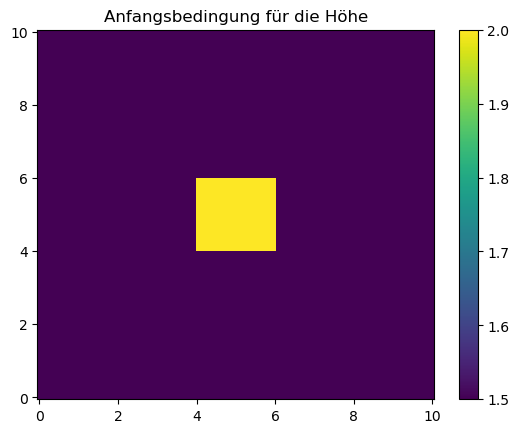

(array([ 0,  0,  0, ..., 99, 99, 99]), array([ 0,  1,  2, ..., 97, 98, 99]))


/var/folders/qg/bvmbx8kx66v9dn0hmz5f07780000gq/T/ipykernel_5409/2056342278.py:43: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


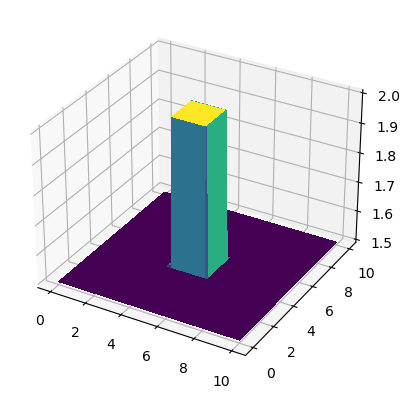

In [35]:
# Berechne ein Gebiet von 10 x 10 Meter, worin x und y jeweils von 0 bis 10 meter gehen, mit einer Anfangsbedingung

# Anfangsbedingung

def Anfangsbedingungen(x,y,t):
    if x >= 4 and x <= 6 and y >= 4 and y <= 6:
        h=2
    else:
        h=1.5
        
    # if t == 0:
    #     u = 0
    #     v = 0
        
    
    # muss man die Anfangsbedingung für u und v auch noch innerhalb der Funktion definieren oder lieber 
    # in der Funktion des Erhaltungsschemas?
    return h

N = 100
x = np.linspace(0,10,100)
y = np.linspace(0,10,100)

#create a meshgrid
X,Y = np.meshgrid(x,y)

#Anfangsbedingung für die Höhe 
H0 = np.array([[Anfangsbedingungen(x,y,0) for x in x] for y in y])

#plot the initial condition
plt.title('Anfangsbedingung für die Höhe')
plt.pcolormesh(X, Y, H0, shading='auto')
plt.colorbar()
plt.show()

#Create a matrix with the initial condition
H0 = np.array([[Anfangsbedingungen(x,y,0) for x in x] for y in y])
#print where the initial condition is not zero
print(np.where(H0 != 0))

#make 3d plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, H0, cmap='viridis', linewidth=0, antialiased=False)
plt.show()


Algorithmus

1. Diskretisierung des 2D-Gebiets mit den acht möglichen Randzellen 
2. Anfangsbedingungen für die Höhe und die Geschwindigkeiten in x-Richtung (u) und in y-Richtung(v)
3. Fluss im Mittelpunkt für x- und y-Richtung: Fw und Gw Matrizen
4. Zeitschritt mit hilfe der EV berechnen (Siehe Seite 13: Implementierung für 2 Dimensionen und CFL<= (1/(2**0.5)))
5. Fluss an der Wand berechnen: F_j12a, F_j12b, G_j12a, G_j12b
6. Erhaltungsschema für h, hu und hv
7. Reflektierende Randsbedingungen (Indexmasken)
